# Import Library

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Membaca csv file dan melihat 5 baris pertama
loan_data = pd.read_csv('C:/Users/lenovo/Documents/ipynb/Dataset/loan_data_2007_2014.csv')
loan_data.head()
pd.options.display.max_columns = 100

In [3]:
# Melihat total baris dan kolom
loan_data.shape

(466285, 75)

Total jumlah baris 466285 dan 75 kolom

In [4]:
# Melihat info seluruh kolom
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Terdapat beberapa kolom/feature yang memiliki null values atau missing values yang akan dibersihkan nanti

# Target Variable
Dikarenakan project ini untuk mengetahui bad loan & good loan, maka perlu dibuat feature baru, yaitu target variable yang merepresentasikan bad loan (sebagai 1) dan good loan (sebagai 0).

In [5]:
# Melihat unique values pada feature loan_status
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [6]:
# Membuat feature baru yaitu good_bad sebagai target variable,
# Jika loan_statusnya 'Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)' 
# akan dianggap sebagai bad_loan atau 1 dan nilai selain itu akan dianggap good loan atau 0
loan_data['good_bad'] = np.where(loan_data.loc[:, 'loan_status'].isin(['Charged Off', 
                                                                  'Default', 'Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period',
                                                                  'Does not meet the credit policy. Status:Fully Paid',
                                                                  'Does not meet the credit policy. Status:Charged Off'])
                                , 1 , 0)

In [7]:
# Melihat distribusi 0 dan 1
loan_data.good_bad.value_counts()

0    408965
1     57320
Name: good_bad, dtype: int64

In [8]:
loan_data.good_bad.value_counts(normalize=True)

0    0.877071
1    0.122929
Name: good_bad, dtype: float64

# Missing Values
Feature yang memiliki missing values lebih dari 50% akan di drop, karena jika ingin diisi dengan nilai lain seperti median atau mean, maka errornya akan sangat tinggi. Lebih baik di drop agar tidak membuat model semakin tidak akurat.

In [9]:
# Melihat feature apa saja yang memiliki missing value lebih dari 50%
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]
missing_values.sort_values([0], ascending=False)

,0
open_il_24m,1.000000
mths_since_rcnt_il,1.000000
total_cu_tl,1.000000
inq_fi,1.000000
all_util,1.000000
max_bal_bc,1.000000
open_rv_24m,1.000000
open_rv_12m,1.000000
il_util,1.000000
total_bal_il,1.000000


In [10]:
# Drop feature tersebut
loan_data.dropna(thresh = loan_data.shape[0]*0.5, axis=1, inplace=True)

In [11]:
# Pengecheckan ulang apakah feature tersebut berhasil di drop
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]
missing_values.sort_values([0], ascending=False)

,0


# Data Cleaning

In [12]:
# Dapat dilakukan print untuk semua unique values kolom, sehingga dapat di cek satu-satu
# unique values apa saja yang kotor.

for col in loan_data.select_dtypes(include= ['object','bool']).columns:
    print(col)
    print(loan_data[col].unique())
    print()

term
[' 36 months' ' 60 months']

grade
['B' 'C' 'A' 'E' 'F' 'D' 'G']

sub_grade
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']

emp_title
[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'MecÃ¡nica'
 'Chief of Interpretation (Park Ranger)' 'Server Engineer Lead']

emp_length
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

verification_status
['Verified' 'Source Verified' 'Not Verified']

issue_d
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-

['f' 'w']

last_pymnt_d
['Jan-15' 'Apr-13' 'Jun-14' 'Jan-16' 'Apr-12' 'Nov-12' 'Jun-13' 'Sep-13'
 'Jul-12' 'Oct-13' 'May-13' 'Feb-15' 'Aug-15' 'Oct-12' 'Sep-12' nan
 'Dec-12' 'Dec-14' 'Aug-13' 'Nov-13' 'Jan-14' 'Apr-14' 'Aug-14' 'Oct-14'
 'Aug-12' 'Jul-14' 'Jul-13' 'Apr-15' 'Feb-14' 'Sep-14' 'Jun-12' 'Feb-13'
 'Mar-13' 'May-14' 'Mar-15' 'Jan-13' 'Dec-13' 'Feb-12' 'Mar-14' 'Sep-15'
 'Nov-15' 'Dec-15' 'Jan-12' 'Oct-15' 'Nov-14' 'Mar-12' 'May-12' 'Jun-15'
 'May-15' 'Jul-15' 'Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11'
 'Jun-11' 'May-11' 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10'
 'Oct-10' 'Sep-10' 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10'
 'Feb-10' 'Jan-10' 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09'
 'Jun-09' 'May-09' 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Oct-08'
 'Aug-08' 'Jul-08' 'Sep-08' 'Jun-08' 'May-08' 'Nov-08' 'Apr-08' 'Mar-08'
 'Feb-08' 'Jan-08' 'Dec-07']

next_pymnt_d
[nan 'Feb-16' 'Jan-16' 'Sep-13' 'Feb-14' 'May-14' 'Jun-13' 'Ma

In [13]:
# Kolom/feature yang harus di cleaning
col_need_to_clean = ['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 
                    'next_pymnt_d', 'last_credit_pull_d']

In [14]:
# Menghilangkan ' months' menjadi ''
loan_data['term'].str.replace(' months', '')

0          36
1          60
2          36
3          36
4          60
         ... 
466280     60
466281     60
466282     60
466283     36
466284     36
Name: term, Length: 466285, dtype: object

In [15]:
# Convert data type menjadi numeric 
loan_data['term'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))

In [16]:
loan_data['term']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term, Length: 466285, dtype: int64

In [17]:
# Cek values apa saja yang harus di cleaning
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [18]:
loan_data['emp_length'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace('< 1 year', str(0))
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' year', '')

loan_data['emp_length'].fillna(value = 0, inplace=True)
loan_data['emp_length'] = pd.to_numeric(loan_data['emp_length'])

In [19]:
loan_data['emp_length']

0         10
1          0
2         10
3         10
4          1
          ..
466280     4
466281    10
466282     7
466283     3
466284    10
Name: emp_length, Length: 466285, dtype: int64

In [20]:
# Cek feature date
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d',
                    'next_pymnt_d', 'last_credit_pull_d']

loan_data[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,Dec-11,Jan-85,Jan-15,NaN,Jan-16
1,Dec-11,Apr-99,Apr-13,NaN,Sep-13
2,Dec-11,Nov-01,Jun-14,NaN,Jan-16
3,Dec-11,Feb-96,Jan-15,NaN,Jan-15
4,Dec-11,Jan-96,Jan-16,Feb-16,Jan-16
...,...,...,...,...,...
466280,Jan-14,Apr-03,Jan-16,Feb-16,Jan-16
466281,Jan-14,Jun-97,Dec-14,NaN,Jan-16
466282,Jan-14,Dec-01,Jan-16,Feb-16,Dec-15
466283,Jan-14,Feb-03,Dec-14,NaN,Apr-15


In [21]:
for col in col_date:
    loan_data[col] = pd.to_datetime(loan_data[col], format='%b-%y')

In [22]:
# Check apakah berhasil di cleaning
loan_data[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   term                466285 non-null  int64         
 1   emp_length          466285 non-null  int64         
 2   issue_d             466285 non-null  datetime64[ns]
 3   earliest_cr_line    466256 non-null  datetime64[ns]
 4   last_pymnt_d        465909 non-null  datetime64[ns]
 5   next_pymnt_d        239071 non-null  datetime64[ns]
 6   last_credit_pull_d  466243 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2)
memory usage: 24.9 MB


In [23]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Unnamed: 0                  466285 non-null  int64         
 1   id                          466285 non-null  int64         
 2   member_id                   466285 non-null  int64         
 3   loan_amnt                   466285 non-null  int64         
 4   funded_amnt                 466285 non-null  int64         
 5   funded_amnt_inv             466285 non-null  float64       
 6   term                        466285 non-null  int64         
 7   int_rate                    466285 non-null  float64       
 8   installment                 466285 non-null  float64       
 9   grade                       466285 non-null  object        
 10  sub_grade                   466285 non-null  object        
 11  emp_title                   438697 non-

# Correlation

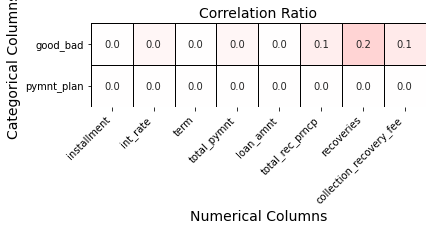

In [24]:
from jcopml.plot import plot_correlation_ratio
df_corrat = plot_correlation_ratio(loan_data, ['good_bad','pymnt_plan'],['installment','int_rate','term','total_pymnt','loan_amnt','total_rec_prncp', 'recoveries', 'collection_recovery_fee'], report=True)

In [29]:
from jcopml.plot import plot_correlation_matrix
plot_correlation_matrix(loan_data, 'good_bad', numeric_col='auto')

interactive(children=(ToggleButtons(description='method', options=('spearman', 'kendall', 'pearson', 'pearson_…

In [28]:
loan_data.drop(columns="policy_code", inplace=True)

# Dataset Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X = loan_data.drop('good_bad', axis=1)
y = loan_data['good_bad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
y_train.value_counts(normalize=True)

In [ ]:
# Distribusi y_test sudah sama persis dengan y_train
y_test.value_counts(normalize=True)

# Feature Engineering

In [ ]:
# Kolom yang akan di feature engineering
col_need_to_clean

In [ ]:
X_train = X_train[['term','emp_length','issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d','total_rec_prncp', 'recoveries', 'collection_recovery_fee']]
X_test = X_test[['term','emp_length','issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d','total_rec_prncp', 'recoveries', 'collection_recovery_fee']]

In [ ]:
# tidak dibutuhkan untuk feature engineering
del X_train['next_pymnt_d']
del X_test['next_pymnt_d']

In [ ]:
X_train.shape, X_test.shape

In [ ]:
from datetime import date

date.today().strftime('%Y-%m-%d')

In [ ]:
# feature engineering untuk date columns
def date_columns(df, column):
    today_date = pd.to_datetime(date.today().strftime('%Y-%m-%d'))
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    df.drop(columns = [column], inplace=True)
    
# apply to X_train
date_columns(X_train, 'earliest_cr_line')
date_columns(X_train, 'issue_d')
date_columns(X_train, 'last_pymnt_d')
date_columns(X_train, 'last_credit_pull_d')

In [ ]:
# apply to X_test
date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'issue_d')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')

In [ ]:
X_test.isnull().sum()

In [ ]:
X_train.isnull().sum()

In [ ]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

In [ ]:
X_train

# Perbandingan Algoritma

In [ ]:
results = pd.DataFrame({
    'Model': [ 'KNN', 
              'Logistic Regression',
              'Naive Bayes'],
    'Score': [ acc_knn,acc_log,acc_gaussian],
    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      accuracy_nb
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

# Training

Disini kita akan mencoba 2 algoritma yaitu Xgboost dan Logistik regression. Setelah kita mendapatkan persentase scoring, lalu akan dievaluasi dengan metrik yang berbeda khusus untuk klasifikasi

### Modelling I Menggunakan Algoritma XGBOOST

In [ ]:
from jcopml.pipeline import num_pipe, cat_pipe
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard', transform='yeo-johnson'), X_train.columns),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

xgboost = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_jobs=-1, verbose=1, random_state=42)
xgboost.fit(X_train, y_train)

print(xgboost.best_params_)
print(xgboost.score(X_train, y_train), xgboost.best_score_, xgboost.score(X_test, y_test))

### Evaluasi Metrik XGBOOST

In [ ]:
from jcopml.plot import plot_confusion_matrix, plot_classification_report, plot_roc_curve, plot_pr_curve
plot_confusion_matrix(X_train, y_train, X_test, y_test, xgboost)

In [ ]:
plot_classification_report(X_train, y_train, X_test, y_test, xgboost, report=True)

In [ ]:
plot_pr_curve(X_train, y_train, X_test, y_test, xgboost)

In [ ]:
plot_roc_curve(X_train, y_train, X_test, y_test, xgboost)

### Modelling I Menggunakan Algoritma LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard', transform='yeo-johnson'), X_train.columns),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(multi_class='ovr', solver='lbfgs', n_jobs=-1, random_state=42))
])

LogReg = RandomizedSearchCV(pipeline, rsp.logreg_params, cv=3, n_jobs=-1, verbose=1, random_state=42)
LogReg.fit(X_train, y_train)

print(LogReg.best_params_)
print(LogReg.score(X_train, y_train), LogReg.best_score_, LogReg.score(X_test, y_test))

### Evaluasi Metrik LOGISTIC REGRESSION

In [ ]:
from jcopml.plot import plot_confusion_matrix, plot_classification_report, plot_roc_curve, plot_pr_curve
plot_confusion_matrix(X_train, y_train, X_test, y_test, LogReg)

In [ ]:
plot_classification_report(X_train, y_train, X_test, y_test, LogReg, report=True)

In [ ]:
plot_pr_curve(X_train, y_train, X_test, y_test, LogReg)

In [ ]:
plot_roc_curve(X_train, y_train, X_test, y_test, LogReg)

In [ ]:
result = pd.DataFrame({
    'Model': [ 'xgboost', 
              'Logistic Regression'],
    'Score': [ model.score(X_test, y_test), LogReg.score(X_test, y_test)]})
#      "Accuracy_score":[ model, LogReg]})

result = result.reset_index(drop=True)
result.head()

In [ ]:
loan_data.head()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard', transform='yeo-johnson'), X_train.columns),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])

model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["______________"]),
    ('categoric', cat_pipe(encoder='onehot'), ["_____________"]),
])



